In [ ]:
# 9.1 アヤメのデータ
import statsmodels.api as sm

my_data = sm.datasets.get_rdataset('iris', 'datasets').data
my_data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
my_data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# 9.2 木による分類
import graphviz
import pandas as pd
import statsmodels.api as sm
from sklearn import tree

my_data = sm.datasets.get_rdataset('iris', 'datasets').data
X, y = my_data.iloc[:, 0:4], my_data.Species

my_model = tree.DecisionTreeClassifier(max_depth=2, random_state=0)
my_model.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=0)

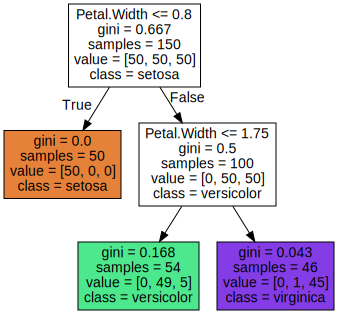

In [ ]:
my_dot = tree.export_graphviz(
    decision_tree=my_model,
    out_file=None,                     # ファイルに出力しない
    feature_names=X.columns,         # 変数名
    class_names=my_model.classes_,  # カテゴリ名
    filled=True                         # 色を塗る
)

graphviz.Source(my_dot)

In [ ]:
my_test = pd.DataFrame([[5.0, 3.5, 1.5, 0.5],
                        [6.5, 3.0, 5.0, 2.0]])
my_model.predict(my_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['setosa', 'virginica'], dtype=object)

In [ ]:
pd.DataFrame(
    my_model.predict_proba(my_test),
    columns=my_model.classes_
)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


,setosa,versicolor,virginica
0,1.0,0.000000,0.000000
1,0.0,0.021739,0.978261


In [ ]:
# 9.3正解率
import graphviz
import pandas as pd
import statsmodels.api as sm
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, LeaveOneOut

my_data = sm.datasets.get_rdataset('iris', 'datasets').data
X, y = my_data.iloc[:, 0:4], my_data.Species

my_model = tree.DecisionTreeClassifier(max_depth=2, random_state=0).fit(X, y)
y_ = my_model.predict(X)
confusion_matrix(y_true=y, y_pred=y_)

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]])

In [ ]:
my_model.score(X, y)

0.96

In [ ]:
y_ = my_model.predict(X)
(y_ == y).mean()

0.96

In [ ]:
cross_val_score(my_model, X, y, cv=LeaveOneOut()).mean()

0.9533333333333334

In [ ]:
my_search = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=0),
    param_grid={'max_depth': range(1, 11)},
    cv=LeaveOneOut(),
    n_jobs=-1
).fit(X, y)
my_search.best_params_, my_search.best_score_

({'max_depth': 2}, 0.9533333333333334)

In [ ]:
my_params = {
    'max_depth': range(2,6),
    'min_samples_split': [2, 20],
    'min_samples_leaf': range(1, 8)
}
my_search = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(min_impurity_decrease=0.01,
                                          random_state=0),
    param_grid=my_params,
    cv=LeaveOneOut(),
    n_jobs=-1
).fit(X, y)
my_search.best_params_, my_search.best_score_

({'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2},
 0.9733333333333334)

In [ ]:
tmp = my_search.cv_results_
my_results = pd.DataFrame(tmp['params']).assign(
    Accuracy = tmp['mean_test_score']
)
# 正解率の最大値
my_results[my_results.Accuracy == my_results.Accuracy.max()]

,max_depth,min_samples_leaf,min_samples_split,Accuracy
22,3,5,2,0.973333
23,3,5,20,0.973333
36,4,5,2,0.973333
37,4,5,20,0.973333
50,5,5,2,0.973333
51,5,5,20,0.973333


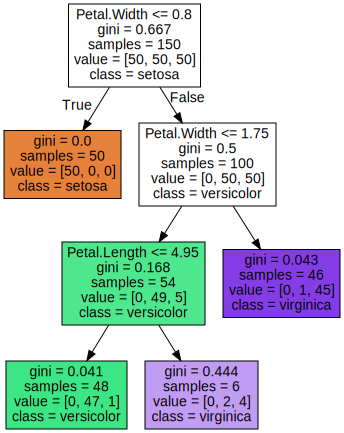

In [ ]:
my_model = my_search.best_estimator_
my_dot = tree.export_graphviz(
    decision_tree=my_model,
    out_file=None,
    feature_names=X.columns,
    class_names=my_model.classes_,
    filled=True
)
graphviz.Source(my_dot)

In [ ]:
# 9.4
import graphviz
import pandas as pd
import statsmodels.api as sm
import warnings
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, LeaveOneOut

my_data = sm.datasets.get_rdataset('iris', 'datasets').data
X, y = my_data.iloc[:, 0:4], my_data.Species

my_search = GridSearchCV(
    RandomForestClassifier(),
    param_grid={'max_features': [2, 3, 4]},
    cv=LeaveOneOut(),
    n_jobs=-1
).fit(X, y)
my_search.best_params_

{'max_features': 3}

In [ ]:
my_search.cv_results_['mean_test_score']

array([0.95333333, 0.96      , 0.96      ])

In [ ]:
import graphviz
import pandas as pd
import statsmodels.api as sm
import warnings
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, LeaveOneOut

my_data = sm.datasets.get_rdataset('iris', 'datasets').data
X, y = my_data.iloc[:, 0:4], my_data.Species

warnings.simplefilter('ignore', UserWarning) # これ以降警告を出さない
my_serach = GridSearchCV(
    xgboost.XGBClassifier(eval_metric='mlogloss'),
    param_grid={
        'n_estimators': [50, 100, 150],
        'max_depth': [1, 2, 3],
        'learning_rate': [0.3, 0.4],
        'gamma': [0],
        'colsample_bytree': [0.6, 0.8],
        'min_child_weight': [1],
        'subsample': [0.5, 0.75, 1]
    },
    cv=5, # 5分割交差検証
    n_jobs=1
).fit(X, y)
warnings.simplefilter('default', UserWarning) # これ以降警告を出す
my_search.best_params_

ValueError: ignored

In [ ]:
warnings.simplefilter('ignore') # これ以降，警告を表示しない．
my_search = GridSearchCV(
    xgboost.XGBClassifier(eval_metric='mlogloss'),
    param_grid={'n_estimators'    : [50, 100, 150],
                'max_depth'       : [1, 2, 3],
                'learning_rate'   : [0.3, 0.4],
                'gamma'           : [0],
                'colsample_bytree': [0.6, 0.8],
                'min_child_weight': [1],
                'subsample'       : [0.5, 0.75, 1]},
    cv=5, # 5分割交差検証
    n_jobs=1).fit(X, y) # n_jobs=-1ではない．
warnings.simplefilter('default') # これ以降，警告を表示する．

my_search.best_params_
#> {'colsample_bytree': 0.6,
#>  'gamma': 0,
#>  'learning_rate': 0.3,
#>  'max_depth': 1,
#>  'min_child_weight': 1,
#>  'n_estimators': 50,
#>  'subsample': 0.75}

my_search.best_score_
#> 0.9666666666666668

ValueError: ignored

In [ ]:
my_search.best_score_

In [ ]:
my_model = RandomForestClassifier().fit(X, y)
tmp = pd.Series(my_model.feature_importances_, index=X.columns)
tmp.sort_values().plot(kind='barsh')

In [3]:
# 9.5 欠損のあるデータでの学習
# 1.欠損を埋めて学習する
# 2.欠損があっっても使える手法を使う

import graphviz
import pandas as pd
import numpy as np
import statsmodels.api as sm
import warnings
import xgboost
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, LeaveOneOut

my_data = sm.datasets.get_rdataset('iris', 'datasets').data

n = len(my_data)
my_data['Petal.Length'] = [np.nan if i % 10 == 0 else
                           my_data['Petal.Length'][i] for i in range(n)]
my_data['Petal.Width'] = [np.nan if i % 10 == 0 else
                           my_data['Petal.Width'][i] for i in range(n)]
my_data.describe() # countの値が135の変数に，150-135=15の欠損がある

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,135.000000,135.000000
mean,5.843333,3.057333,3.751852,1.194074
std,0.828066,0.435866,1.763640,0.752286
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.550000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
X, y = my_data.iloc[:, 0:4], my_data.Species

In [7]:
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # 欠損を中央値で埋める
    ('tree', tree.DecisionTreeClassifier(random_state=0))
])
my_scores = cross_val_score(my_pipeline, X, y, cv=LeaveOneOut(), n_jobs=-1)
my_scores.mean()

0.8866666666666667

In [9]:
warnings.simplefilter('ignore', UserWarning) # これ以降，警告を表示しない．
my_scores = cross_val_score(
    xgboost.XGBClassifier(eval_metric='mlogloss'), X, y, cv=5
)

warnings.simplefilter('default', UserWarning) # これ以降，警告を表示する．

my_scores.mean()

ValueError: ignored

In [10]:
# 9.6 他の分類手法
from sklearn.model_selection import cross_val_score, LeaveOneOut
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier

my_data = sm.datasets.get_rdataset('iris', 'datasets').data
X, y = my_data.iloc[:, 0:4], my_data.Species

my_score = cross_val_score(KNeighborsClassifier(), X, y, cv=LeaveOneOut())
my_score.mean()

0.9666666666666667

In [11]:
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_data = sm.datasets.get_rdataset('iris','datasets').data
X, y = my_data.iloc[:, 0:4], my_data.Species

my_pipeline = Pipeline([
    ('sc', StandardScaler()), # 標準化
    ('mlp', MLPClassifier()) # ニューラルネットワーク
])
my_scores = cross_val_score(my_pipeline, X, y, cv=LeaveOneOut(), n_jobs=-1)
my_scores.mean()

0.9533333333333334